# NETFLIX STATISTICS

### imports 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from importlib import reload 
plt=reload(plt)


## Goal
* Visualise the number of movies and  tv shows that were released each year on netflix
* We are going to programatically retrive these features

## Create a dataframe nextflix and visualise it

In [46]:
netflix = pd.read_csv('data/netflix.csv')
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Getting all the features that we will be working with and Analyse the data

In [23]:
CATEGORIES_OF_INTREST = ["type", "release_year"]

YEARS = []
CATEGORY = []

for category in CATEGORIES_OF_INTREST:
    category_vocabulary = netflix[category].unique()
    YEARS.append(category_vocabulary) if category == CATEGORIES_OF_INTREST[-1] else CATEGORY.append(category_vocabulary)

years = YEARS[0]
categories = CATEGORY[0]
categories

array(['TV Show', 'Movie'], dtype=object)

In [5]:
netflix.shape

(7787, 12)

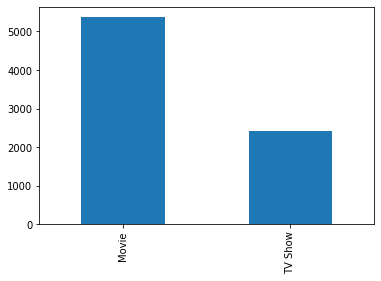

In [4]:
netflix['type'].value_counts().plot(kind="bar")
plt.show()

### Getting all the data for visualisation

In [10]:
# For all the TV Shows Statistics

years_released_tv_show = netflix.loc[netflix.type=="TV Show"].value_counts(['release_year']).to_frame().reset_index()
years_released_tv_show.columns = ["release_year", "frequency"]
years_released_tv_show

x_labels_tv_show = years_released_tv_show.pop("release_year")
y_values_tv_show = years_released_tv_show.pop("frequency")

# For all the movies Statistics
years_released_movies = netflix.loc[netflix.type=="Movie"].value_counts(['release_year']).to_frame().reset_index()
years_released_movies.columns = ["release_year", "frequency"]
years_released_movies

x_labels_movies = years_released_movies.pop("release_year")
y_values_movies = years_released_movies.pop("frequency")


### Visualisation

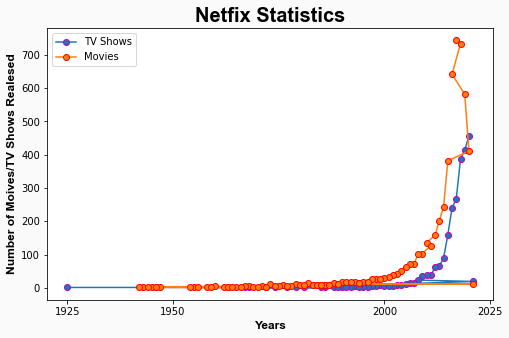

In [45]:
plt.plot(x_labels_tv_show, y_values_tv_show, 'o-', label="TV Shows", markeredgecolor="m")
plt.plot(x_labels_movies, y_values_movies, 'o-', label="Movies", markeredgecolor="r")
plt.title("Netfix Statistics", fontsize=20, fontweight='bold', fontfamily='arial')
plt.xlabel("Years", fontsize=12, fontweight='bold', fontfamily='arial')
plt.ylabel("Number of Moives/TV Shows Realesed", fontsize=12, fontweight='bold', fontfamily='arial')


plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["figure.facecolor"] ='#fafafa'
plt.xticks([1925, 1950, 2000, 2025])
# plt.yticks([0,4, 8, 12, 16, 20, 24, 28])
plt.legend()
plt.show()